In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

errors = [
    pickle.load(open('../modeling/1d/errors.pkl', 'rb')),
    pickle.load(open('../modeling/2d/errors.pkl', 'rb'))
]
bd_dists = [
    pickle.load(open('../modeling/1d/bd_dists.pkl', 'rb')),
    pickle.load(open('../modeling/2d/bd_dists.pkl', 'rb'))
]
ref_fracs = [
    pickle.load(open('../modeling/1d/ref_fracs.pkl', 'rb')),
    pickle.load(open('../modeling/2d/ref_fracs.pkl', 'rb'))
]


In [2]:
for i in range(2):
    print(np.mean(errors[i]['NN']))
    print(np.mean(errors[i]['GMM']))
    

0.005925889449443541
0.015462369218035362
0.0102055132402947
0.019885388034268772


In [3]:
for i in range(2):
    print(np.mean(errors[i]['NN']-errors[i]['GMM']))
    

-0.009536479768591824
-0.009679874793974072


In [4]:
overlaps = bd_dists
for i in range(2):
    overlaps[i] = [np.exp(-j) for j in overlaps[i]]


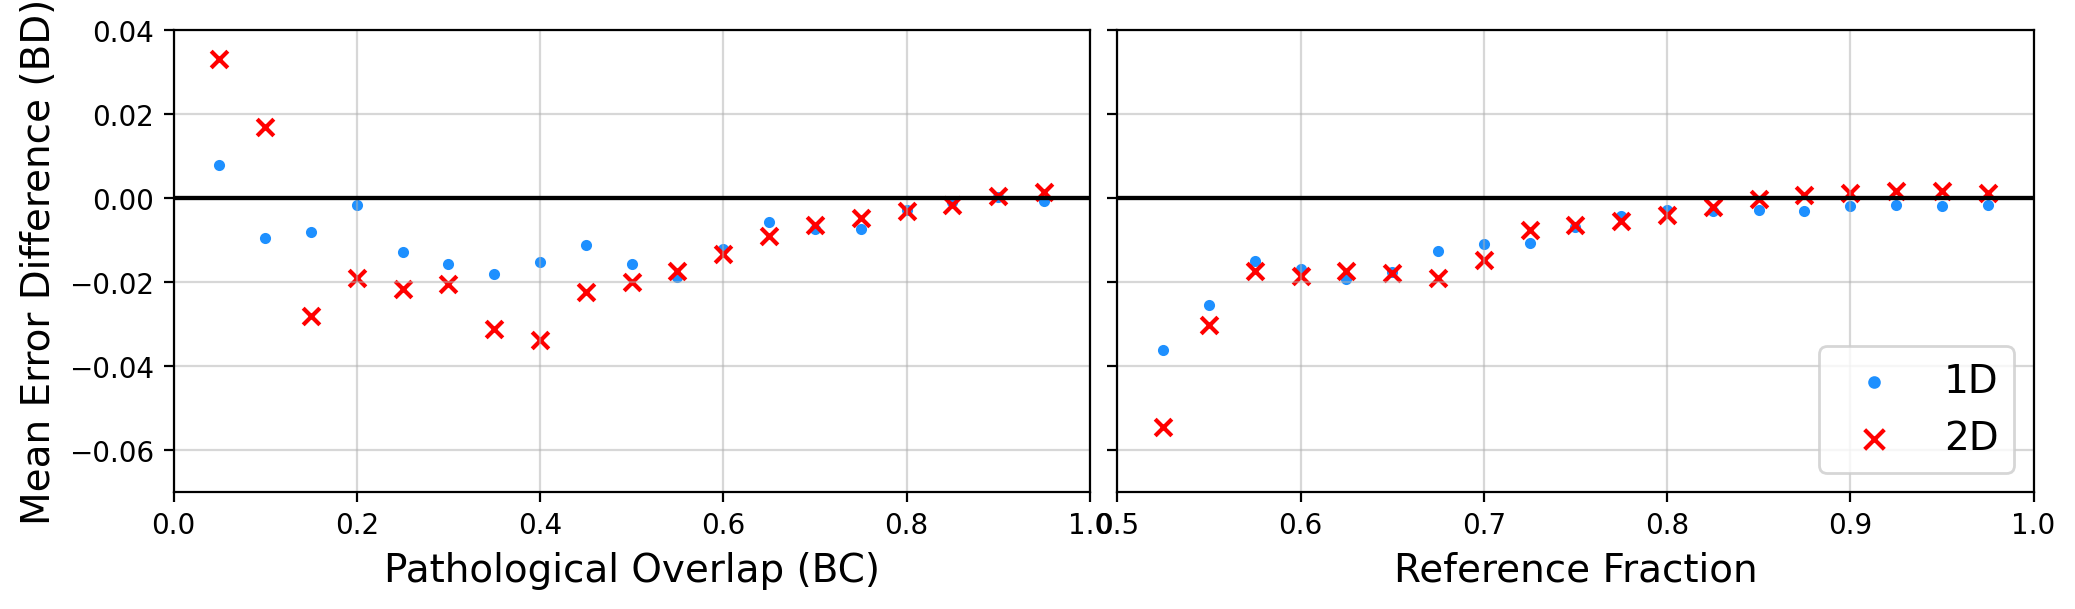

In [5]:
plt.figure(figsize=(12, 3), dpi=200)

window_bins = 2
colors = ['dodgerblue', 'red']
markers = ['.', 'x']
ylimits = [-0.07, 0.04]

for n in range(2): # loop n dimensions

    plt.subplot(1,2,1)
    diffs_mean = []
    diffs_std = []
    bins = np.linspace(0, 1, 21) # bins of overlap
    binwidth = bins[1]-bins[0]
    for i in range(len(bins)-window_bins):
        idx = np.where((overlaps[n]>bins[i]) & (overlaps[n]<bins[i+window_bins]))[0]
        diffs_mean.append(np.mean(errors[n]['NN'][idx]-errors[n]['GMM'][idx]))
        diffs_std.append(np.std(errors[n]['NN'][idx]-errors[n]['GMM'][idx]))
    plt.scatter(
        bins[:-window_bins]+window_bins*binwidth/2, 
        diffs_mean, 
#         yerr = np.array(diffs_std)*2,
        c=colors[n], marker=markers[n])
    plt.xlabel('Pathological Overlap (BC)', fontsize=14)
    plt.ylabel('Mean Error Difference (BD)', fontsize=14)
    plt.grid(alpha=0.5);
    plt.ylim(ylimits);
    plt.axhline(0, c='k')
    plt.xlim([0, 1])

    plt.subplot(1,2,2)
    diffs_mean = []
    diffs_std = []
    bins = np.linspace(0.5, 1, 21) # bins of reference fraction
    binwidth = bins[1]-bins[0]
    for i in range(len(bins)-window_bins):
        idx = np.where((ref_fracs[n]>bins[i]) & (ref_fracs[n]<bins[i+window_bins]))[0]
        diffs_mean.append(np.mean(errors[n]['NN'][idx]-errors[n]['GMM'][idx]))
        diffs_std.append(np.std(errors[n]['NN'][idx]-errors[n]['GMM'][idx]))
    plt.scatter(
        bins[:-window_bins]+window_bins*binwidth/2, 
        diffs_mean, 
#         yerr = np.array(diffs_std)*2,
        c=colors[n], marker=markers[n])
    plt.xlabel('Reference Fraction', fontsize=14)
    plt.grid(alpha=0.5);
    plt.gca().set_yticklabels([])
    plt.ylim(ylimits);
    plt.axhline(0, c='k')
    plt.xlim([0.50, 1]);

plt.subplots_adjust(wspace=0.03)
    
plt.scatter([],[], c=colors[0], marker=markers[0], label='1D')
plt.scatter([],[], c=colors[1], marker=markers[1], label='2D')
lgnd = plt.legend(loc='lower right', fontsize=14);
for handle in lgnd.legend_handles:
    handle.set_sizes([50])

